In [1]:
#MOUNTING OUR DRIVE
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#!pip install scikeras

In [3]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay,classification_report, accuracy_score,f1_score,precision_score,roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv ("Training Data.csv")

###EXPLORATORTY DATA ANALYSIS###

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.000,126000.500,72746.278,1.000,63000.750,126000.500,189000.250,252000.000
Income,252000.000,4997116.665,2878311.014,10310.000,2503015.000,5000694.500,7477502.000,9999938.000
Age,252000.000,49.954,17.064,21.000,35.000,50.000,65.000,79.000
Experience,252000.000,10.084,6.003,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,252000.000,6.334,3.647,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,252000.000,11.998,1.399,10.000,11.000,12.000,13.000,14.000
Risk_Flag,252000.000,0.123,0.328,0.000,0.000,0.000,0.000,1.000


In [8]:
df.describe(include=['O']).T #View description of Categorical/Object datatype

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


In [9]:
#renaming columns
df.rename(columns={"Married/Single":"Married_Single"},inplace=True)

In [10]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married_Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

**BINNING INCOME VALUES**

In [11]:
bins = [0,2500000,5000000,7500000,10000000]
names = ['Lower Income', 'Middle-Lower Income', 'Middle-Upper Income', 'Higher-Upper Income']

df['Income_Category'] = pd.cut(df['Income'], bins, labels=names)

df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married_Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Category'],
      dtype='object')

In [12]:
#Finding null values in Income Category
df.Income_Category.isna().sum()

0

In [13]:
#Finding null values in Income Category
df.Income_Category.value_counts()

Income_Category
Middle-Upper Income    63461
Middle-Lower Income    62998
Lower Income           62960
Higher-Upper Income    62581
Name: count, dtype: int64

In [14]:
#Finding the Length of our newly created column
len(df.Income_Category)

252000

**BINNING FOR EXPERIENCE**

In [15]:
#Categorizing EXPERRIENCE YEARS into levels
#age = 20-29,......79
bins = [-1,5,10,15,20]
# bins = [df['Experience']<1,df['Experience'].between(1-5),df['Experience'].between(5-10) ,df['Experience'].between(10-15),df['Experience'].between(15-20)]

names = ['Level1', 'Level2', 'Level3', 'Level4']

df['Experience_Category'] = pd.cut(df['Experience'], bins, labels=names)



In [16]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married_Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Category',
       'Experience_Category'],
      dtype='object')

In [17]:
#Finding null values in Income Category
df.Experience_Category.isna().sum()

0

In [18]:
df.Experience_Category.value_counts()

Experience_Category
Level1    70022
Level2    61179
Level4    60475
Level3    60324
Name: count, dtype: int64

In [19]:
#Categorizing AGES into Ranges
#age = 20-29,......79
bins = [20,29,39,49,59,69,79]
names = ['20-29', '30-39', '40-49', '50-59','60-69','70-79']

df['Age_Category'] = pd.cut(df['Age'], bins, labels=names)

In [20]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married_Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Category',
       'Experience_Category', 'Age_Category'],
      dtype='object')

In [21]:
df.Age_Category.isna().sum()

0

In [22]:
df.Age_Category.value_counts()

Age_Category
60-69    43569
40-49    43108
50-59    42660
70-79    41747
30-39    41727
20-29    39189
Name: count, dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.isna().sum()

Id                     0
Income                 0
Age                    0
Experience             0
Married_Single         0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Risk_Flag              0
Income_Category        0
Experience_Category    0
Age_Category           0
dtype: int64

**INCOME**

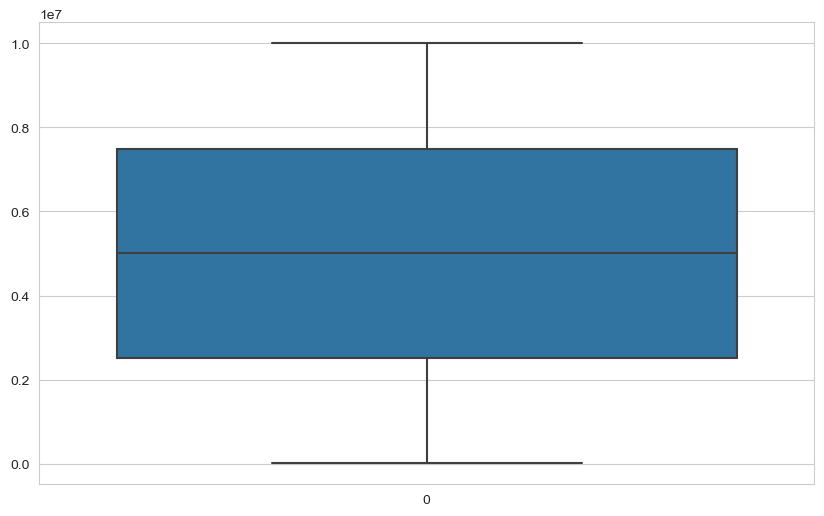

In [25]:
sns.boxplot(df.Income);

/var/folders/cb/x5g_8pxj55b1rjtt39fkrmb80000gn/T/ipykernel_65881/596396278.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Income, color='Purple',shade=True);
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


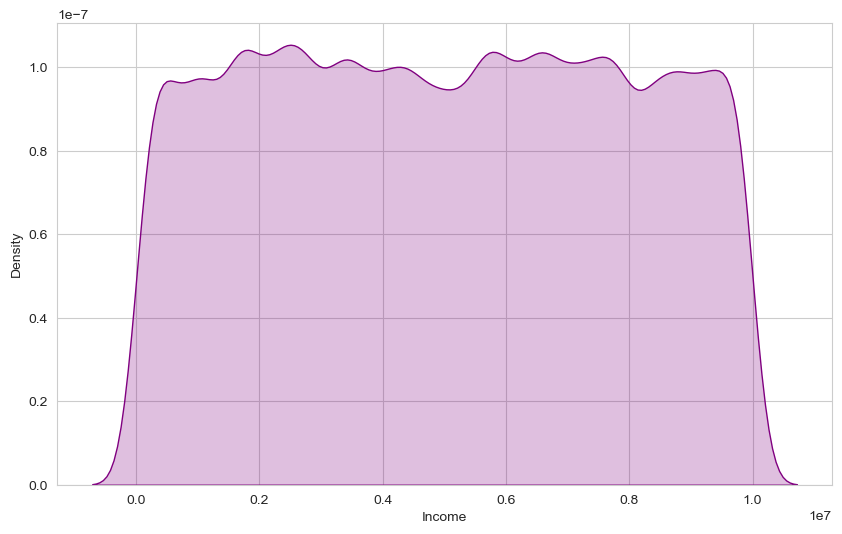

In [26]:
sns.kdeplot(df.Income, color='Purple',shade=True);

In [27]:
#Group by Profession and Income and aggregate the min,max and median income for each peofession
df.groupby("Profession")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False)

,min,max,mean
Profession,,,
Petroleum_Engineer,22921,9968353,5443309.827
Psychologist,33224,9985964,5357795.262
Designer,12841,9996946,5336802.230
Scientist,13792,9975985,5282710.423
Surgeon,18215,9995445,5235358.713
Comedian,13429,9984983,5199538.529
Chemical_engineer,26926,9984718,5189804.995
Mechanical_engineer,37057,9990505,5175032.068
Artist,31297,9976619,5164765.182


In [28]:
#Group by Income_Category and Risk_FLag to have a description of Risks and NO Risks for each income bracket
IncomeCategory_df=df.groupby(['Income_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Income_Category", ascending=False)
IncomeCategory_df

/var/folders/cb/x5g_8pxj55b1rjtt39fkrmb80000gn/T/ipykernel_65881/3405127196.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  IncomeCategory_df=df.groupby(['Income_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Income_Category", ascending=False)


,Income_Category,Risk_Flag,flag_count
6,Higher-Upper Income,0,54668
7,Higher-Upper Income,1,7913
4,Middle-Upper Income,0,55925
5,Middle-Upper Income,1,7536
2,Middle-Lower Income,0,55508
3,Middle-Lower Income,1,7490
0,Lower Income,0,54903
1,Lower Income,1,8057


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

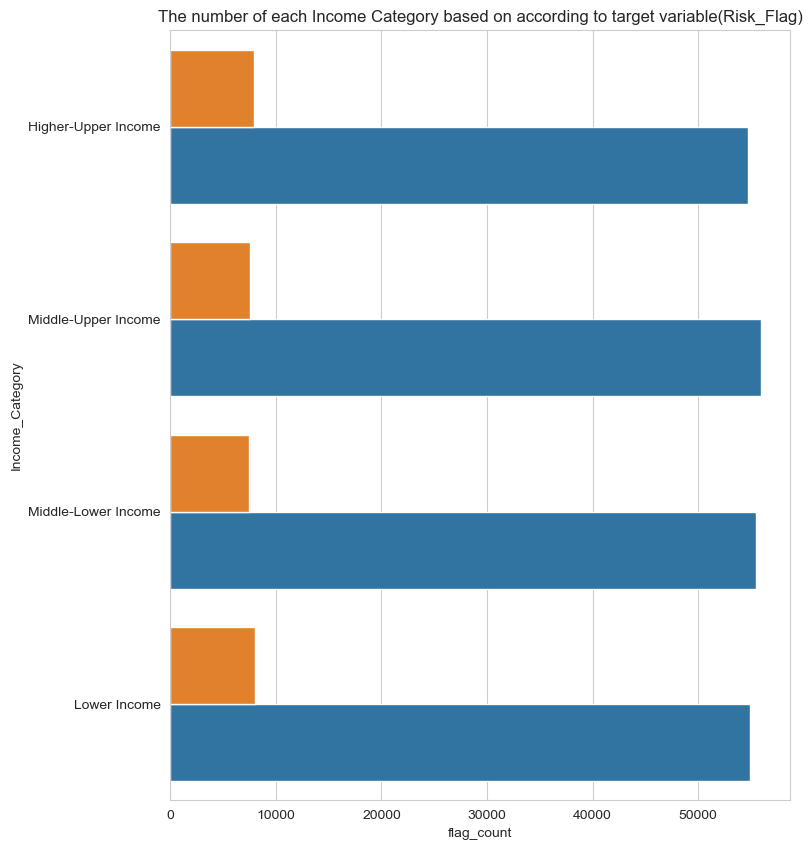

In [29]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(8, 10))
plot_order = IncomeCategory_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each Income Category based on according to target variable(Risk_Flag)')
#plot_order
sns.barplot(y="Income_Category",x="flag_count",hue="Risk_Flag", data=IncomeCategory_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

In [ ]:
# the average risk percentage according to the Income Category
test_dict=df.groupby('Income_Category').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)


new_dict=test_dict.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Expericence Category')
plt.xlabel('House Ownership Type')
plt.ylabel('Percntage')

# Display the plot
plt.show()

**AGE**

In [ ]:
sns.boxplot(df.Age)

In [ ]:
sns.kdeplot(df.Age, color='Red',shade=True);

In [ ]:
#Group by Profession and Income and aggregate the min,max and median income for each peofession
df.groupby("Age_Category")["Income"].agg(["min", "max", "mean"]).sort_values(by="Age_Category", ascending=False)

In [30]:
#Group by Income_Category and Risk_FLag to have a description of Risks and NO Risks for each income bracket
AgeCategory_df=df.groupby(['Age_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Age_Category", ascending=False)
AgeCategory_df

/var/folders/cb/x5g_8pxj55b1rjtt39fkrmb80000gn/T/ipykernel_65881/3765429815.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AgeCategory_df=df.groupby(['Age_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Age_Category", ascending=False)


,Age_Category,Risk_Flag,flag_count
10,70-79,0,36819
11,70-79,1,4928
8,60-69,0,38521
9,60-69,1,5048
6,50-59,0,37512
7,50-59,1,5148
4,40-49,0,38056
5,40-49,1,5052
2,30-39,0,36636
3,30-39,1,5091


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

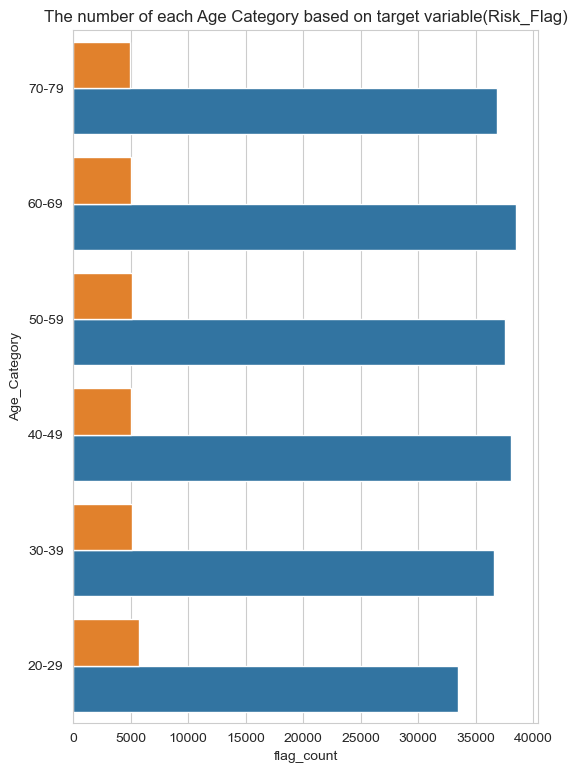

In [31]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(6, 9))
plot_order = IncomeCategory_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each Age Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(y="Age_Category",x="flag_count",hue="Risk_Flag", data=AgeCategory_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

In [ ]:
# the average risk percentage according to the Income Category
test_dict=df.groupby('Age_Category').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)



new_dict=test_dict.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage')

# Display the plot
plt.show()

**EXPERIENCE**

<Axes: >

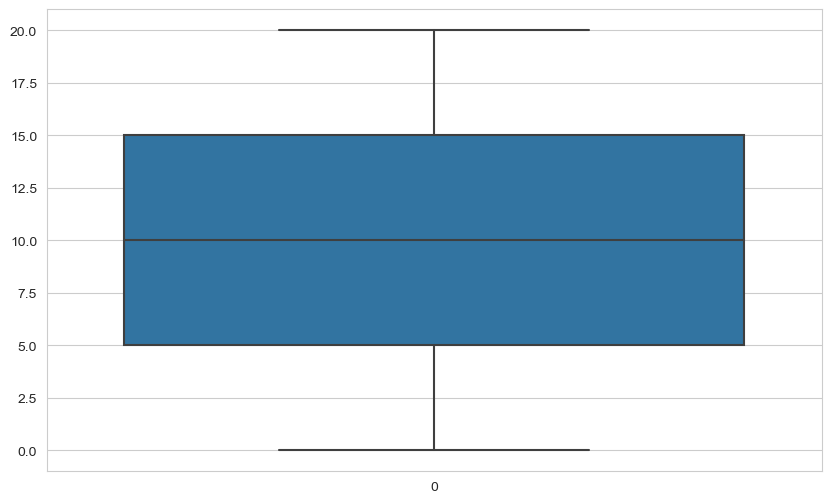

In [32]:
sns.boxplot(df.Experience)

In [33]:
#Group by Profession and Income and aggregate the min,max and median income for each peofession
df.groupby("Experience_Category")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False)

/var/folders/cb/x5g_8pxj55b1rjtt39fkrmb80000gn/T/ipykernel_65881/1787479914.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Experience_Category")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False)


,min,max,mean
Experience_Category,,,
Level3,12902,9999400,5085833.830
Level4,10310,9999938,4988861.328
Level1,10675,9999180,4985942.618
Level2,11799,9998280,4930588.877


In [34]:
ExpCategory_df=df.groupby(['Experience_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Experience_Category", ascending=False)
ExpCategory_df

/var/folders/cb/x5g_8pxj55b1rjtt39fkrmb80000gn/T/ipykernel_65881/3765548706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ExpCategory_df=df.groupby(['Experience_Category','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Experience_Category", ascending=False)


,Experience_Category,Risk_Flag,flag_count
6,Level4,0,53852
7,Level4,1,6623
4,Level3,0,52893
5,Level3,1,7431
2,Level2,0,54111
3,Level2,1,7068
0,Level1,0,60148
1,Level1,1,9874


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

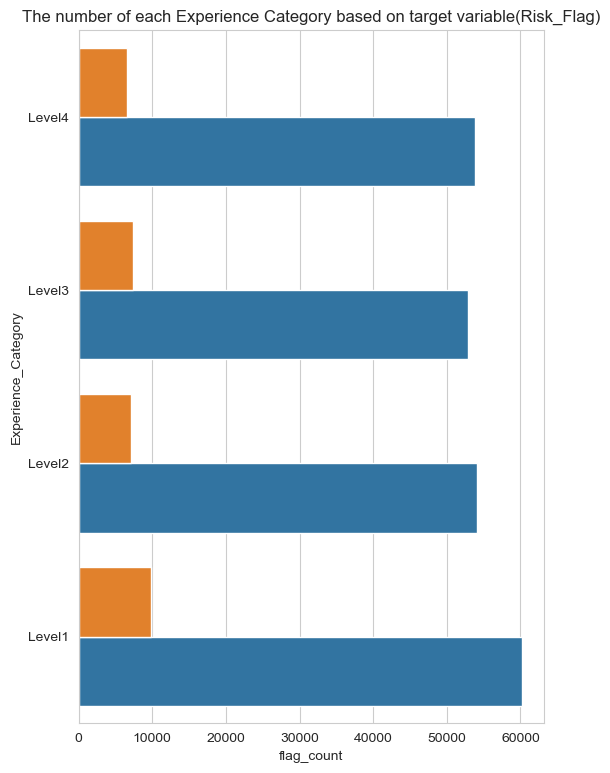

In [35]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(6, 9))
plot_order = IncomeCategory_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each Experience Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(y="Experience_Category",x="flag_count",hue="Risk_Flag", data=ExpCategory_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

In [ ]:
# the average risk percentage according to the Income Category
test_dict=df.groupby('Experience_Category').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

new_dict=test_dict.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Expericence Category')
plt.xlabel('Experience Category')
plt.ylabel('Percentage')

# Display the plot
plt.show()

**MARRIED OR SINGLE**

In [36]:
df["Married_Single"].value_counts()

Married_Single
single     226272
married     25728
Name: count, dtype: int64

In [37]:
df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the marital status

Married_Single
single    12.534
married   10.246
Name: Risk_Flag, dtype: float64

[Text(0, 0, '0.898'), Text(0, 0, '0.102')]

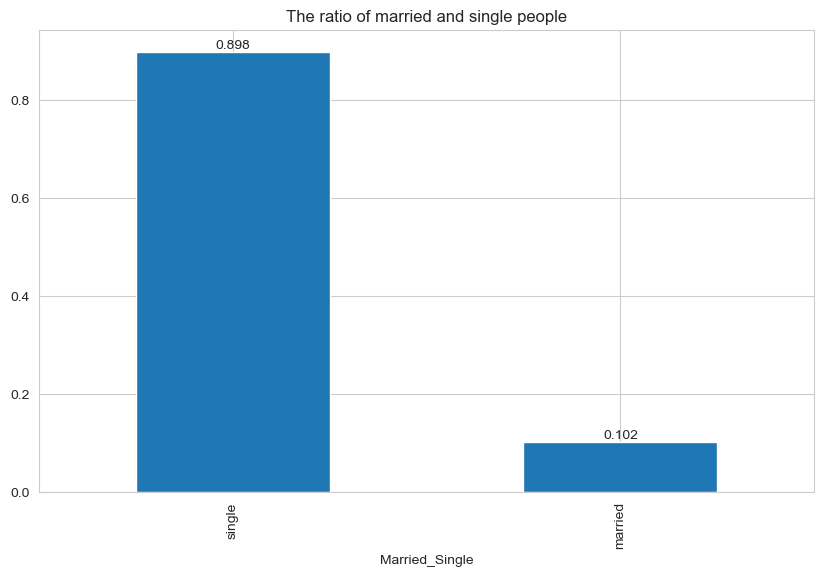

In [38]:
ax = df["Married_Single"].value_counts(normalize=True).plot(kind="bar")
plt.title('The ratio of married and single people')
ax.bar_label(ax.containers[0], fmt="%.3f")

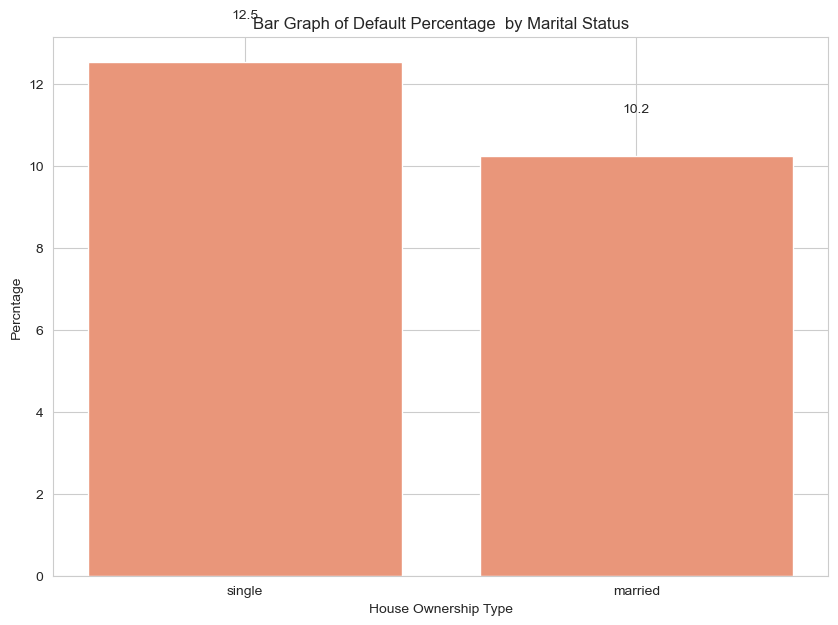

In [39]:
# the average risk percentage according to the Income Category
test_dict=df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)



new_dict=test_dict.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Marital Status')
plt.xlabel('House Ownership Type')
plt.ylabel('Percntage')

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

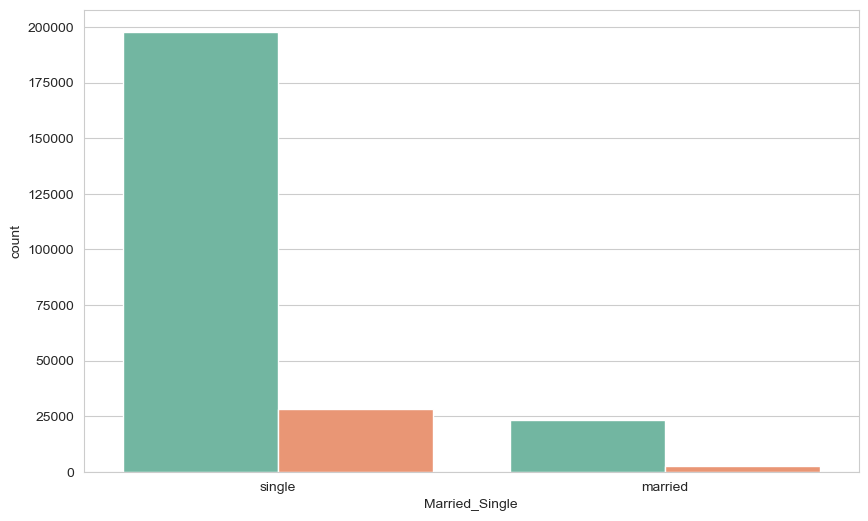

In [40]:
ax = sns.countplot(data = df , x=df["Married_Single"], hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to maritial status')
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df_per =df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
new_dict=df_per.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by House Ownership')
plt.xlabel('House Ownership Type')
plt.ylabel('Percntage')

# Display the plot
plt.show()

**HOUSE OWNERSHIP**

In [ ]:
df["House_Ownership"].value_counts()

In [41]:
df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the marital status

House_Ownership
rented         12.558
norent_noown    9.953
owned           8.980
Name: Risk_Flag, dtype: float64

In [42]:
df[df["House_Ownership"] == "norent_noown"]["Profession"].value_counts()

Profession
Software_Developer            329
Surveyor                      319
Biomedical_Engineer           248
Scientist                     244
Web_designer                  241
Politician                    209
Comedian                      206
Chemical_engineer             201
Hotel_Manager                 201
Computer_operator             201
Computer_hardware_engineer    190
Army_officer                  190
Financial_Analyst             186
Technician                    168
Microbiologist                167
Surgeon                       166
Fashion_Designer              165
Geologist                     163
Industrial_Engineer           162
Petroleum_Engineer            158
Air_traffic_controller        158
Mechanical_engineer           157
Architect                     143
Physician                     141
Civil_engineer                138
Designer                      138
Chartered_Accountant          132
Statistician                  129
Design_Engineer               129
Civ

AttributeError: 'numpy.int64' object has no attribute 'startswith'

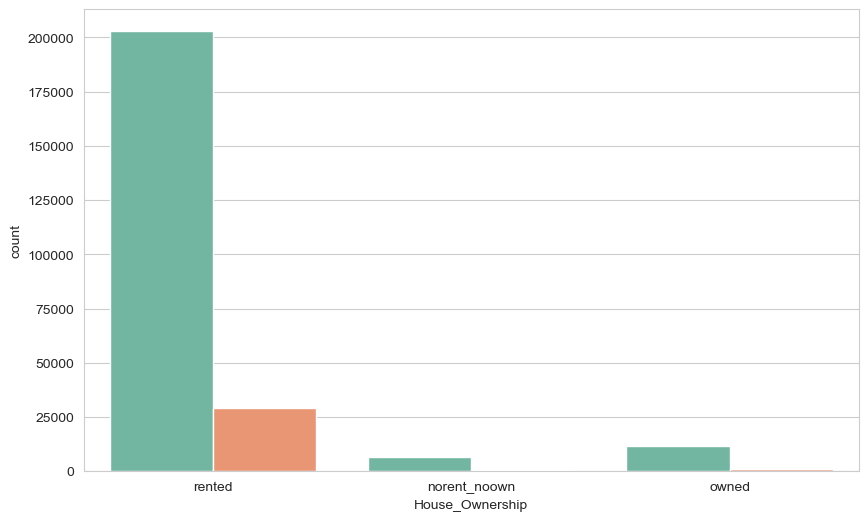

In [43]:
ax = sns.countplot(data = df , x=df["House_Ownership"], hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to house ownership status')
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
#CrossTab of CURRENT_JOB_YRS vs House_Ownership
crosstab_df = pd.crosstab([df.Age_Category], df.House_Ownership)
crosstab_df

In [ ]:
df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

In [ ]:
df_per = df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

new_dict=df_per.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by House Ownership')
plt.xlabel('House Ownership Type')
plt.ylabel('Percntage')

# Display the plot
plt.show()


In [44]:
#CrossTab of CURRENT_JOB_YRS vs House_Ownership
crosstab_df = pd.crosstab([df.Profession], df.House_Ownership)
crosstab_df

House_Ownership,norent_noown,owned,rented
Profession,,,
Air_traffic_controller,158,206,4917
Analyst,122,182,4364
Architect,143,441,4073
Army_officer,190,292,4179
Artist,58,300,4503
Aviator,93,438,4227
Biomedical_Engineer,248,252,4627
Chartered_Accountant,132,250,4111
Chef,94,154,4387


In [45]:
#CrossTab of CURRENT_JOB_YRS vs House_Ownership
crosstab_df = pd.crosstab([df.Income_Category], df.House_Ownership)
crosstab_df

House_Ownership,norent_noown,owned,rented
Income_Category,,,
Lower Income,2039,3062,57859
Middle-Lower Income,2049,3398,57551
Middle-Upper Income,1537,3520,58404
Higher-Upper Income,1559,2938,58084


In [46]:
#CrossTab of CURRENT_JOB_YRS vs House_Ownership
crosstab_df = pd.crosstab([df.CURRENT_JOB_YRS], df.House_Ownership)
crosstab_df

House_Ownership,norent_noown,owned,rented
CURRENT_JOB_YRS,,,
0,489,386,10168
1,155,394,11026
2,425,619,10043
3,563,2081,26816
4,774,1716,25849
5,925,1022,23144
6,715,1152,21624
7,491,673,18761
8,449,837,17588


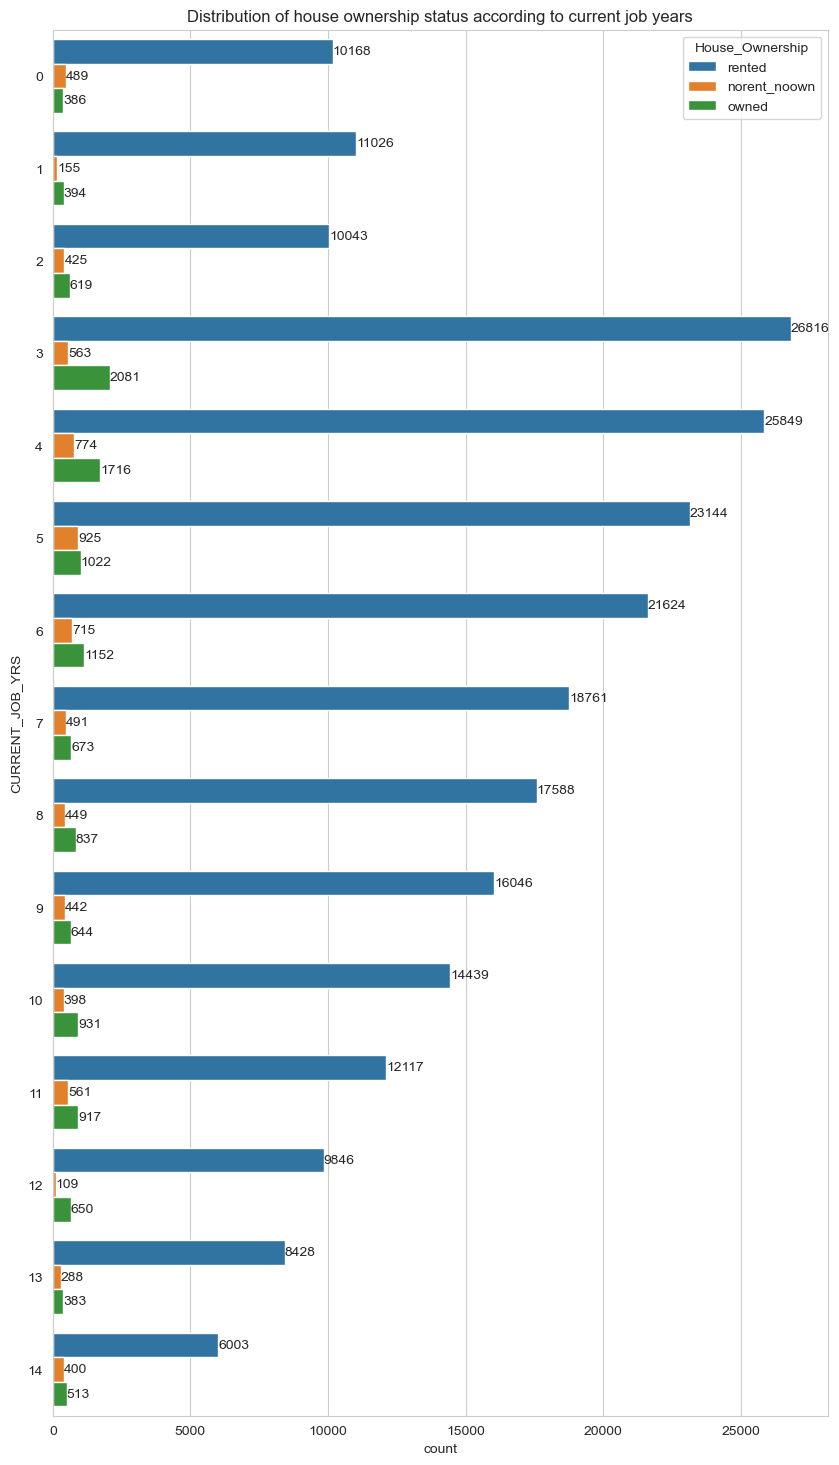

In [47]:
plt.figure(figsize=(10,18))
ax = sns.countplot(data = df , y=df["CURRENT_JOB_YRS"], hue= "House_Ownership")
plt.title('Distribution of house ownership status according to current job years')
for p in ax.containers:
    ax.bar_label(p)

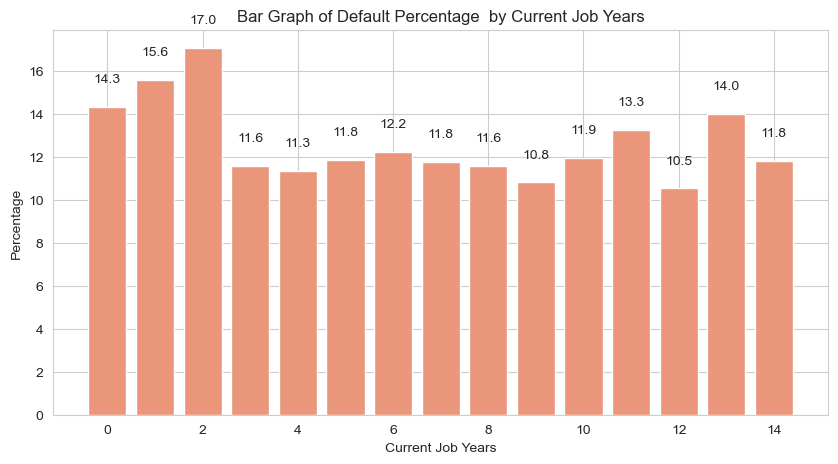

In [48]:
df_per = df.groupby('CURRENT_JOB_YRS').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

new_dict=df_per.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Current Job Years')
plt.xlabel('Current Job Years')
plt.ylabel('Percentage')

# Display the plot
plt.show()

In [49]:
HouseYears_df=df.groupby(['CURRENT_HOUSE_YRS','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="CURRENT_HOUSE_YRS", ascending=False)
HouseYears_df

,CURRENT_HOUSE_YRS,Risk_Flag,flag_count
8,14,0,43058
9,14,1,5945
6,13,0,44477
7,13,1,6182
4,12,0,45487
5,12,1,6304
2,11,0,45390
3,11,1,6483
0,10,0,42592
1,10,1,6082


AttributeError: 'numpy.int64' object has no attribute 'startswith'

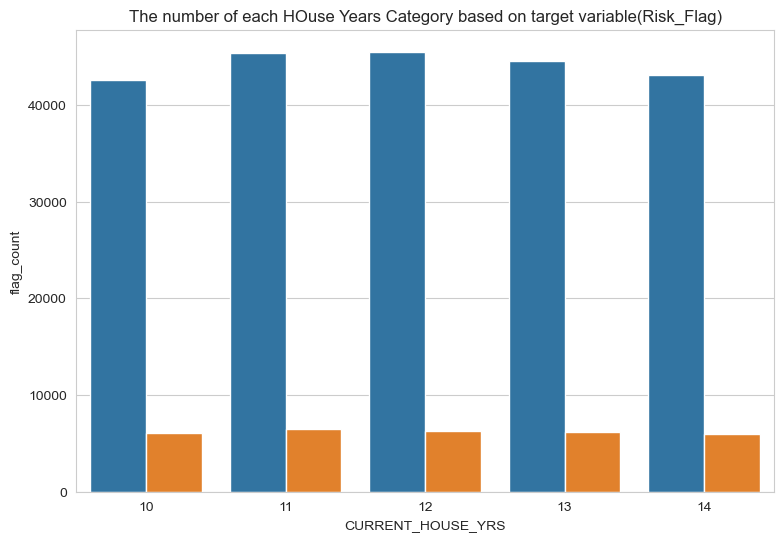

In [50]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(9, 6))
plot_order = HouseYears_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each HOuse Years Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(x="CURRENT_HOUSE_YRS",y="flag_count",hue="Risk_Flag", data=HouseYears_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

In [ ]:
df_per = df.groupby('CURRENT_HOUSE_YRS').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

new_dict=df_per.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
#plt.title('Bar Graph of Default Percentage  by Current House Years')
plt.xlabel('Current House Years')
plt.ylabel('Percentage')

# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(10,18))
ax = sns.countplot(data = df , x=df["House_Ownership"], hue= "CURRENT_JOB_YRS", palette="Set3")
plt.title('Distribution of the current job years according to house ownership status')
for bars in ax.containers:
        ax.bar_label(bars);

In [51]:
HouseCategory_df=df.groupby(['House_Ownership','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="House_Ownership", ascending=False)
HouseCategory_df

,House_Ownership,Risk_Flag,flag_count
4,rented,0,202777
5,rented,1,29121
2,owned,0,11758
3,owned,1,1160
0,norent_noown,0,6469
1,norent_noown,1,715


AttributeError: 'numpy.int64' object has no attribute 'startswith'

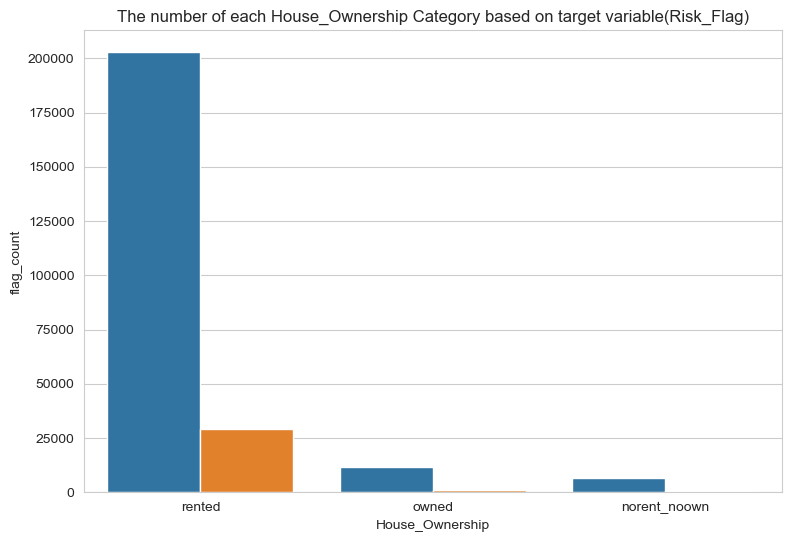

In [52]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(9, 6))
plot_order = IncomeCategory_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each House_Ownership Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(x="House_Ownership",y="flag_count",hue="Risk_Flag", data=HouseCategory_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

**CAR OWNERSHIP**

In [ ]:
df["Car_Ownership"].value_counts()

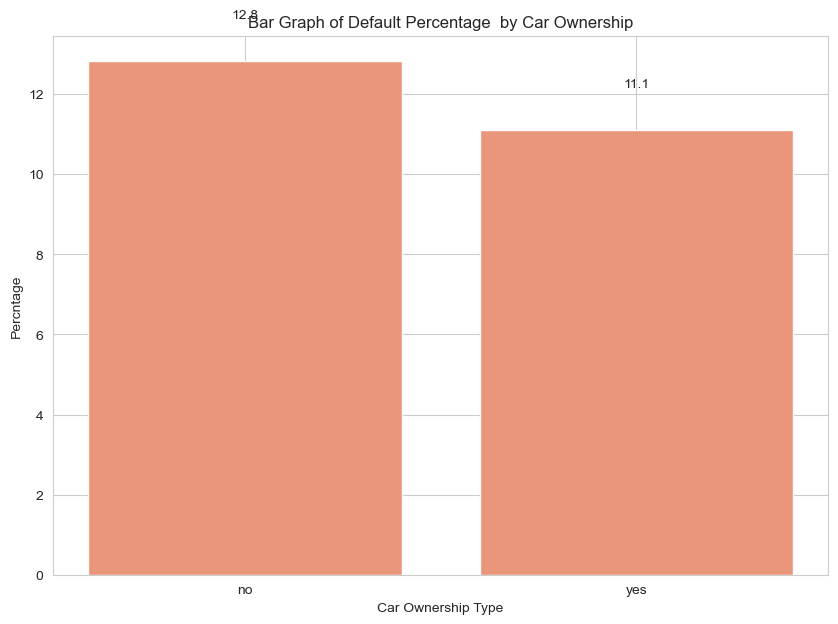

In [53]:
test_dict=df.groupby('Car_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the car ownership status

# the average risk percentage according to the Income Category
#test_dict=df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)



new_dict=test_dict.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom')

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Car Ownership')
plt.xlabel('Car Ownership Type')
plt.ylabel('Percntage')

# Display the plot
plt.show()

In [54]:
CarCategory_df=df.groupby(['Car_Ownership','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Car_Ownership", ascending=False)
CarCategory_df

,Car_Ownership,Risk_Flag,flag_count
2,yes,0,67565
3,yes,1,8435
0,no,0,153439
1,no,1,22561


AttributeError: 'numpy.int64' object has no attribute 'startswith'

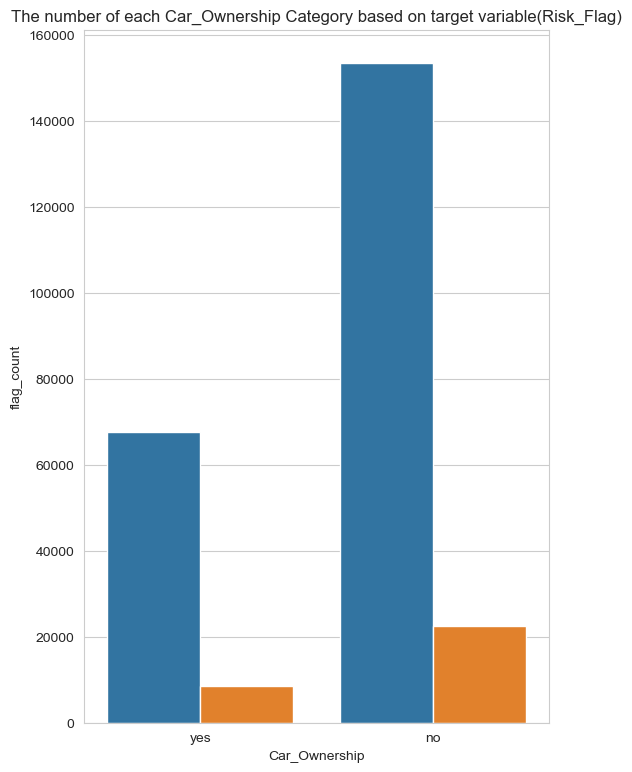

In [55]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(6, 9))
plot_order = IncomeCategory_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each Car_Ownership Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(x="Car_Ownership",y="flag_count",hue="Risk_Flag", data=CarCategory_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

**PROFESSION**

In [ ]:
df["Profession"].value_counts()

In [ ]:
plt.figure(figsize=(15,13))
ax = sns.countplot(data = df , y=df["Profession"].sort_values(), order = df['Profession'].value_counts().index, palette="Set1")
plt.xticks(rotation=90)
plt.title('The number of each profession')
for bars in ax.containers:
        ax.bar_label(bars);

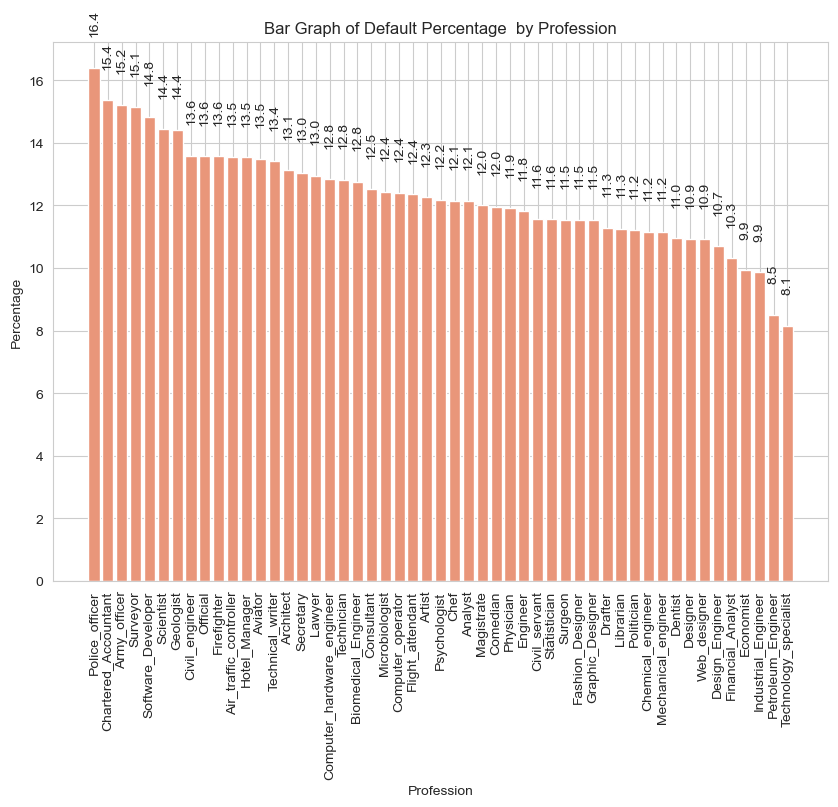

In [56]:
DF_PER=df.groupby('Profession').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the car ownership status




new_dict=DF_PER.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom',rotation=90)

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Profession')
plt.xlabel('Profession')
# Rotate x-axis tick labels
plt.xticks(rotation=90)  # Rotates the labels by 45 degrees
plt.ylabel('Percentage')

# Display the plot
plt.show()

In [57]:
Profession_df=df.groupby(['Profession','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="Profession", ascending=False)
Profession_df

,Profession,Risk_Flag,flag_count
101,Web_designer,1,589
100,Web_designer,0,4808
99,Technology_specialist,1,386
98,Technology_specialist,0,4351
97,Technician,1,624
...,...,...,...
5,Architect,1,611
2,Analyst,0,4101
3,Analyst,1,567
1,Air_traffic_controller,1,715


AttributeError: 'numpy.int64' object has no attribute 'startswith'

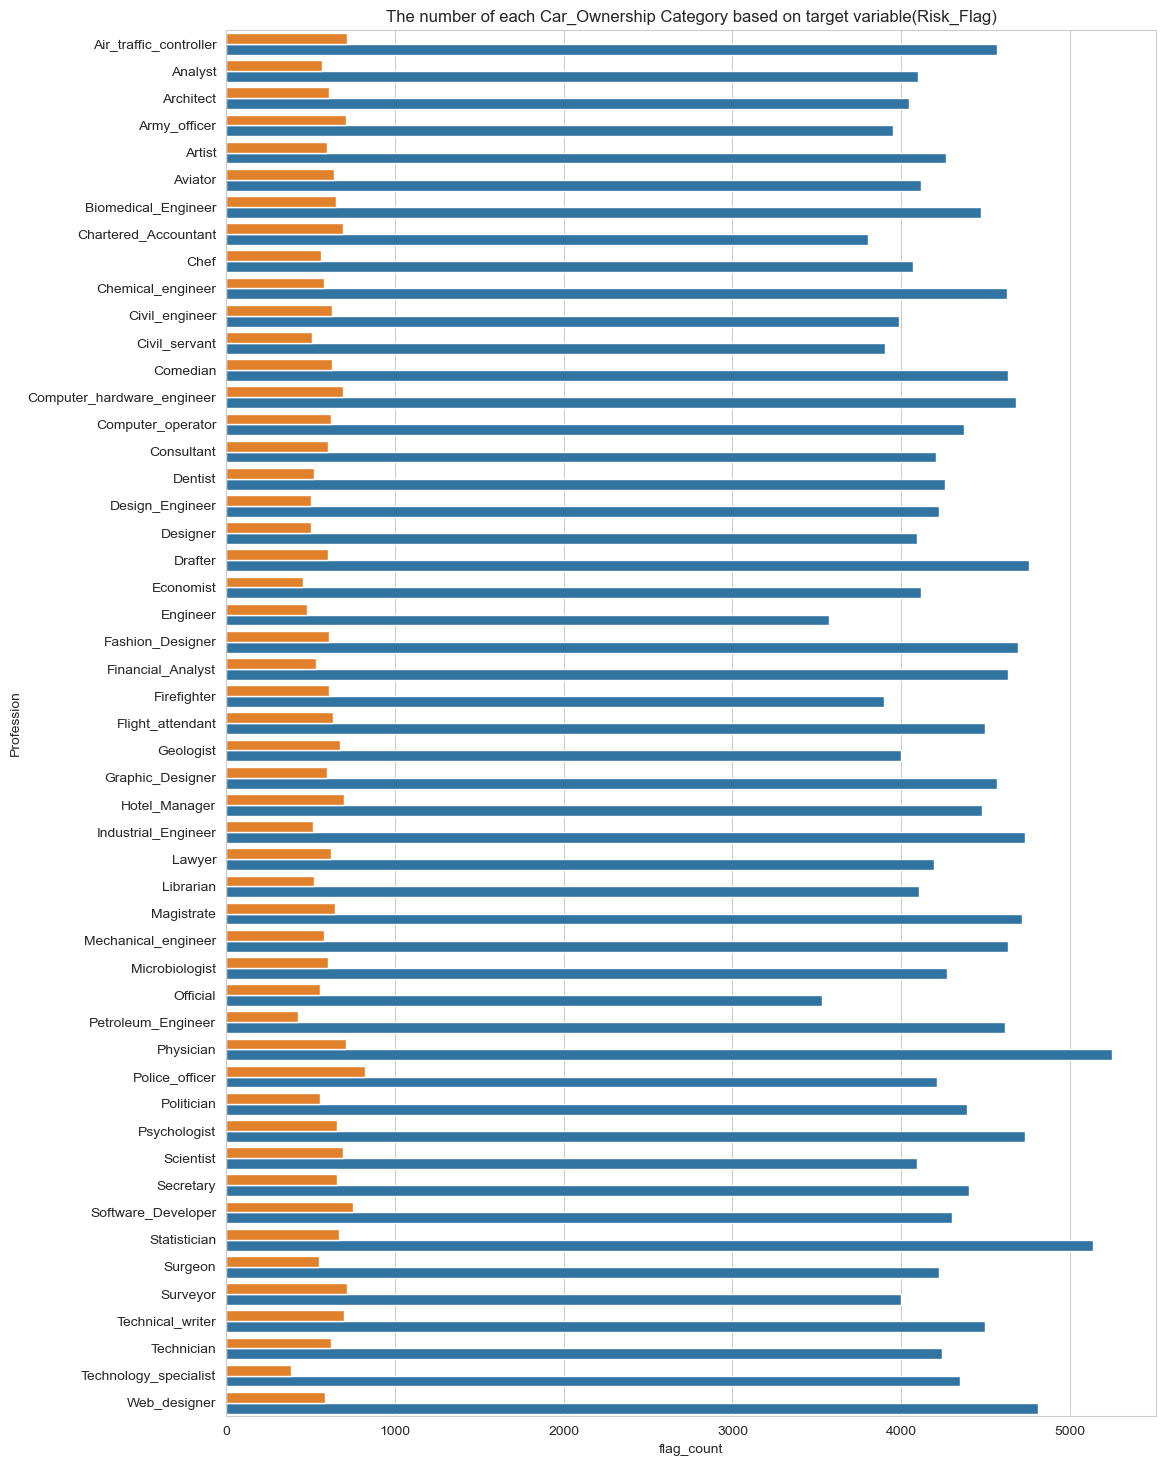

In [58]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(12, 18))
plot_order = Profession_df.sort_values(by='flag_count', ascending=False).value_counts().index
plt.title('The number of each Car_Ownership Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(y="Profession",x="flag_count",hue="Risk_Flag", data=Profession_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

**CITY**

In [ ]:
df["CITY"].value_counts()

In [ ]:
pd.DataFrame(df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False))

In [ ]:
pd.DataFrame(df.groupby(['STATE', "CITY"]).Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False))

**STATE**

In [ ]:
df["STATE"].value_counts()

In [ ]:
#Merge Uttar_Pradesh and Uttar_Pradesh[5]
df["STATE"] = df["STATE"].apply(lambda x: "Uttar_Pradesh" if x == "Uttar_Pradesh[5]" else x)

In [ ]:
df.STATE.value_counts()

In [59]:
df.groupby('STATE').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage of each state

STATE
Manipur             21.555
Tripura             16.811
Kerala              16.710
Jammu_and_Kashmir   15.899
Madhya_Pradesh      15.437
Odisha              14.255
Rajasthan           14.083
Jharkhand           13.330
Chhattisgarh        13.328
Himachal_Pradesh    13.325
Assam               13.169
Bihar               13.059
Uttar_Pradesh[5]    13.055
Telangana           13.012
West_Bengal         12.814
Haryana             12.421
Gujarat             11.772
Uttar_Pradesh       11.771
Puducherry          11.654
Andhra_Pradesh      11.602
Maharashtra         11.325
Mizoram             11.072
Delhi               10.455
Tamil_Nadu          10.316
Karnataka           10.030
Chandigarh           9.299
Punjab               9.004
Uttarakhand          7.097
Sikkim               4.605
Name: Risk_Flag, dtype: float64

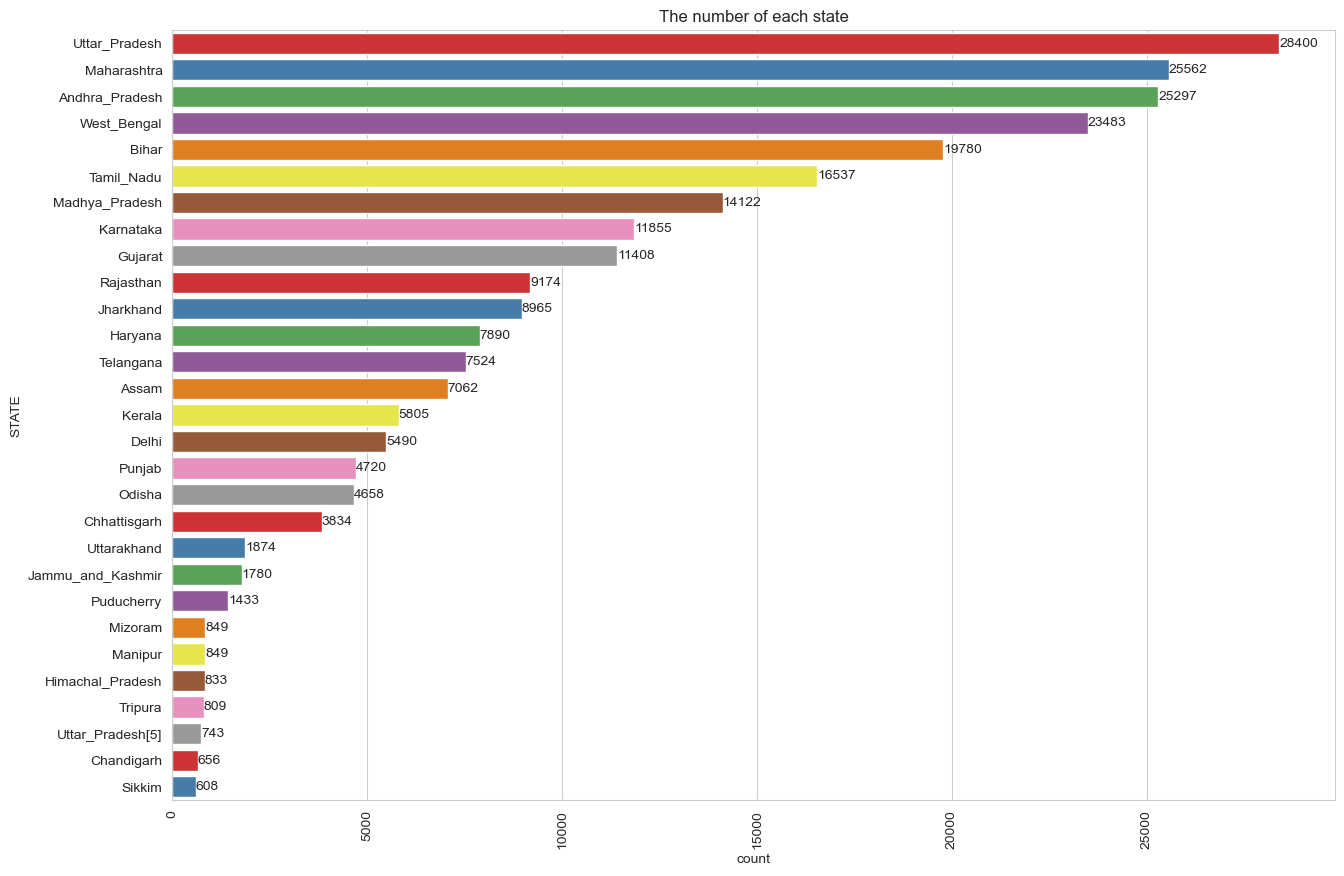

In [60]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data = df , y=df["STATE"].sort_values(), order = df['STATE'].value_counts().index, palette="Set1")
plt.xticks(rotation=90)
plt.title('The number of each state')
for bars in ax.containers:
        ax.bar_label(bars);

In [61]:
State_df=df.groupby(['STATE','Risk_Flag'],as_index=False).agg(flag_count=('Risk_Flag','count')).sort_values(by="STATE", ascending=False)
State_df

,STATE,Risk_Flag,flag_count
57,West_Bengal,1,3009
56,West_Bengal,0,20474
55,Uttarakhand,1,133
54,Uttarakhand,0,1741
53,Uttar_Pradesh[5],1,97
52,Uttar_Pradesh[5],0,646
51,Uttar_Pradesh,1,3343
50,Uttar_Pradesh,0,25057
49,Tripura,1,136
48,Tripura,0,673


AttributeError: 'numpy.int64' object has no attribute 'startswith'

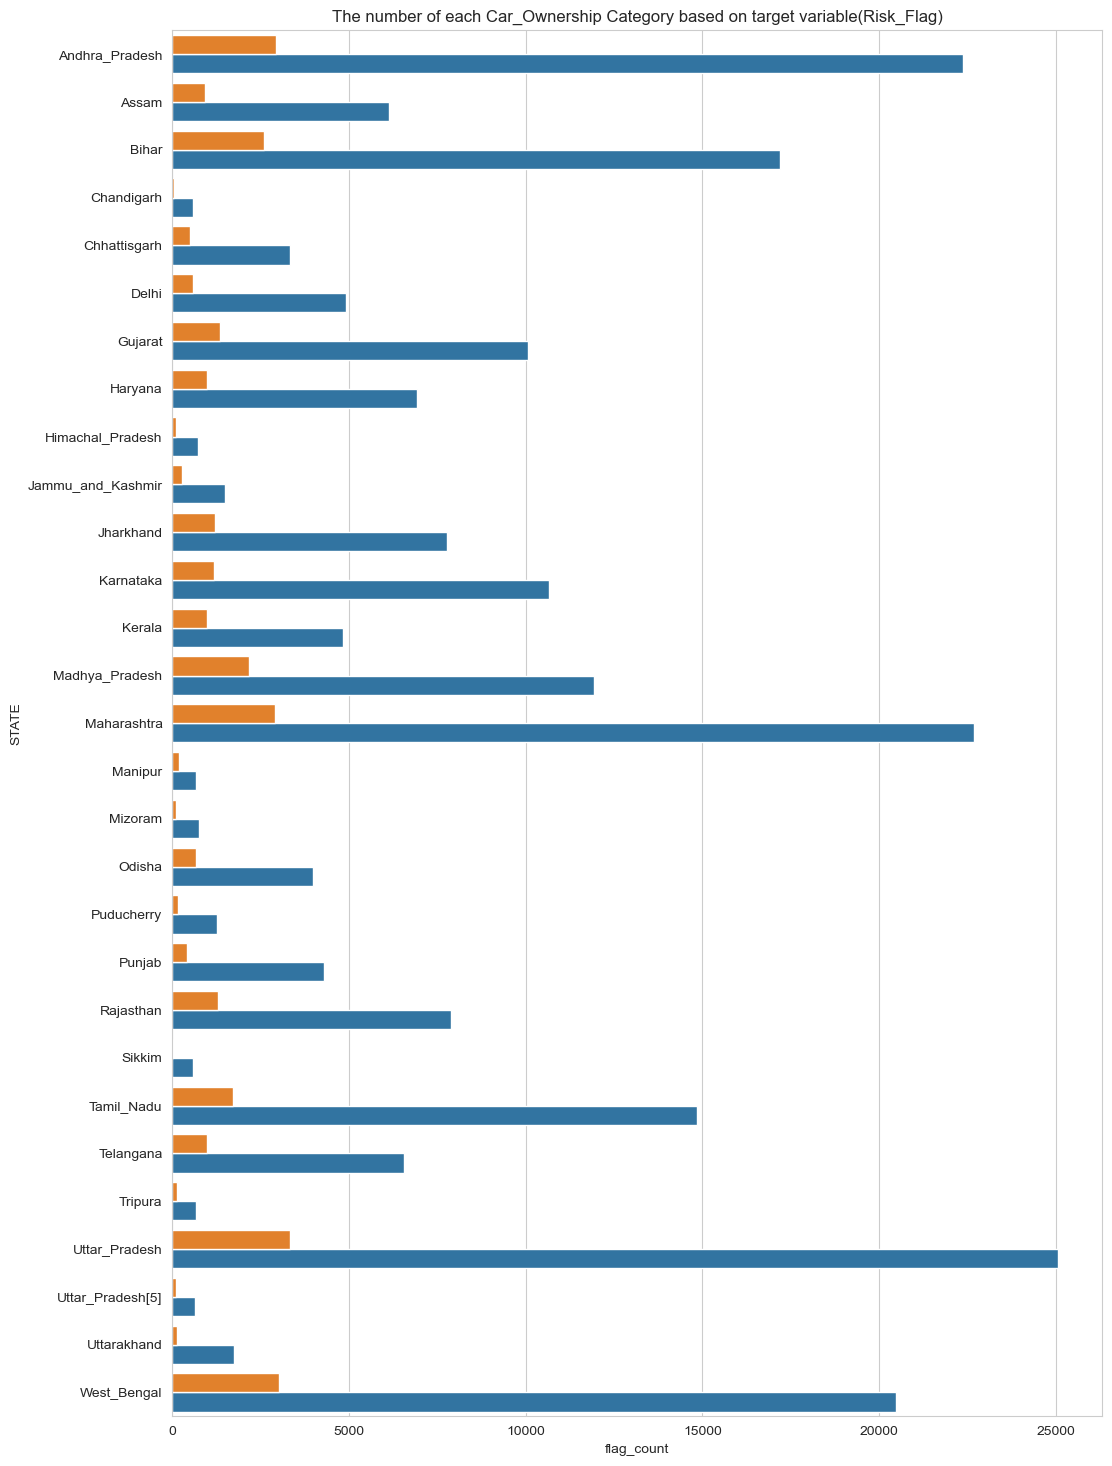

In [62]:
#plot the aggregated data
fig, ax = plt.subplots(figsize=(12, 18))
plot_order = Profession_df.sort_values(by='flag_count', ascending=False).Risk_Flag.values
plt.title('The number of each Car_Ownership Category based on target variable(Risk_Flag)')
#plot_order
sns.barplot(y="STATE",x="flag_count",hue="Risk_Flag", data=State_df,ax=ax)
for bars in ax.containers:
  ax.bar_label(bars);

**CURRENT JOB YEARS**

In [ ]:
df["CURRENT_JOB_YRS"].value_counts()

In [ ]:
#Function to calculate weighted income average for each profession based on currenjob years
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [63]:
df_weight=df.groupby('Profession').apply(w_avg, 'Income', 'CURRENT_JOB_YRS').sort_values(ascending=False)
df_weight
# Weighted Income Average for each profession

NameError: name 'w_avg' is not defined

In [64]:
new_dict=df_weight.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom',rotation=90)

# Adding title and labels
plt.title('Bar Graph of Weighted Income Average  by Profession')
plt.xlabel('Profession')
# Rotate x-axis tick labels
plt.xticks(rotation=90)  # Rotates the labels by 90 degrees
plt.ylabel('Weighted Average Income')

# Display the plot
plt.show()

NameError: name 'df_weight' is not defined

AttributeError: 'numpy.int64' object has no attribute 'startswith'

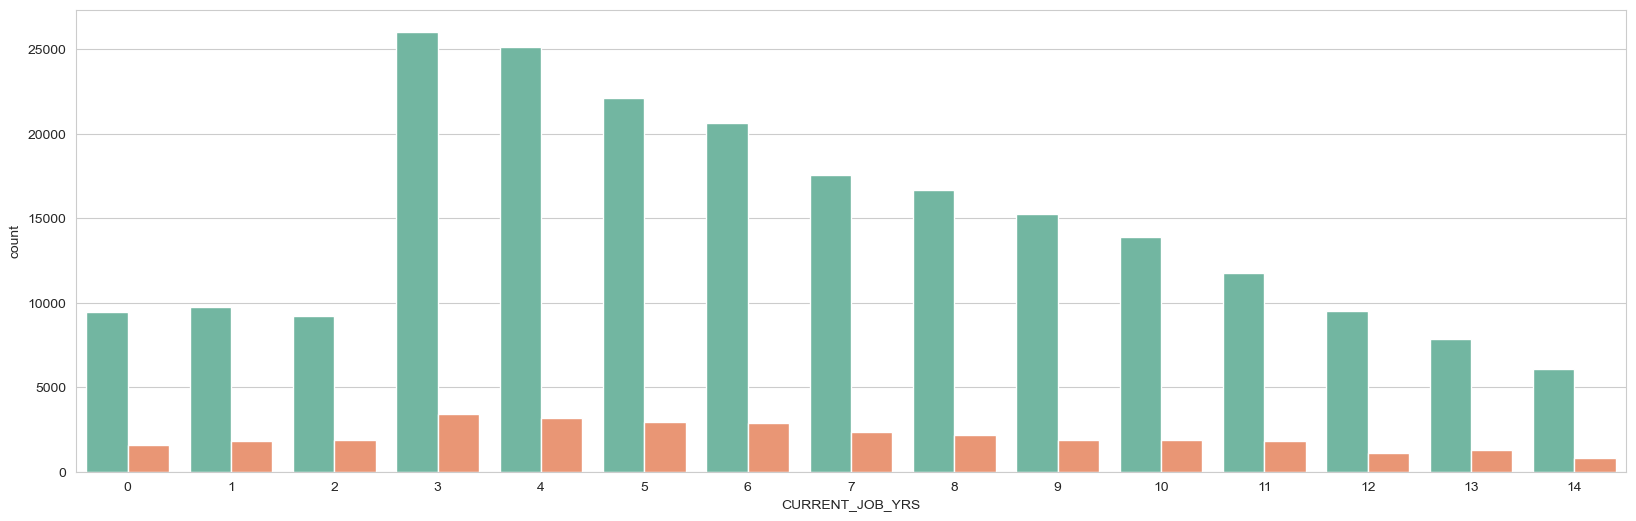

In [65]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data = df , x=df["CURRENT_JOB_YRS"].sort_values(), hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to current job years')
for bars in ax.containers:
        ax.bar_label(bars);

In [66]:
df.groupby('CURRENT_JOB_YRS').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

CURRENT_JOB_YRS
2    17.047
1    15.568
0    14.326
13   13.969
11   13.255
6    12.217
10   11.923
5    11.845
14   11.813
7    11.769
3    11.578
8    11.556
4    11.317
9    10.799
12   10.523
Name: Risk_Flag, dtype: float64

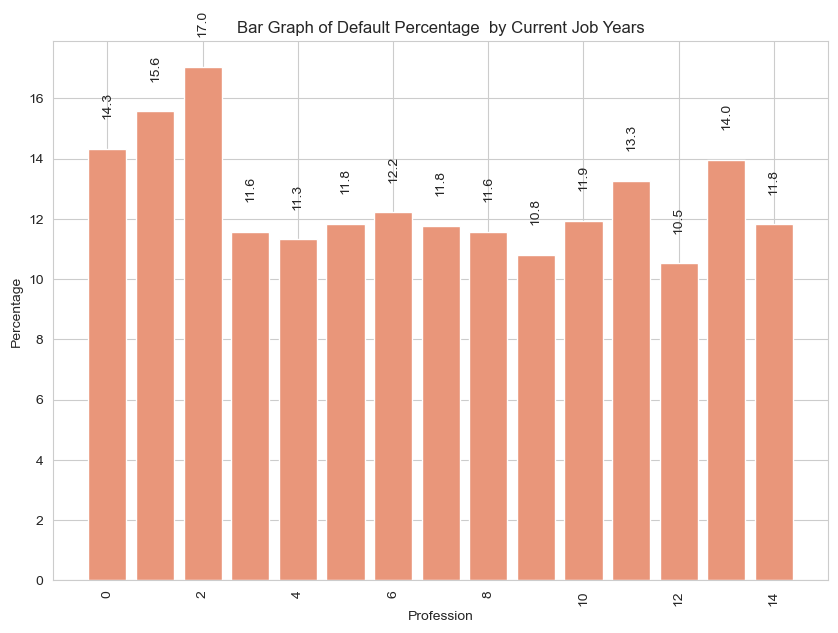

In [67]:
DF_PER=df.groupby('CURRENT_JOB_YRS').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the current job years

new_dict=DF_PER.to_dict()
# Keys and values from the dictionary
keys = new_dict.keys()
values = new_dict.values()

# Plotting the bar graph
plt.figure(figsize=(10, 7))
bars = plt.bar(keys, values, color='#e9967a')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom',rotation=90)

# Adding title and labels
plt.title('Bar Graph of Default Percentage  by Current Job Years')
plt.xlabel('Profession')
# Rotate x-axis tick labels
plt.xticks(rotation=90)  # Rotates the labels by 45 degrees
plt.ylabel('Percentage')

# Display the plot
plt.show()

**RISK FLAG**

In [68]:
df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

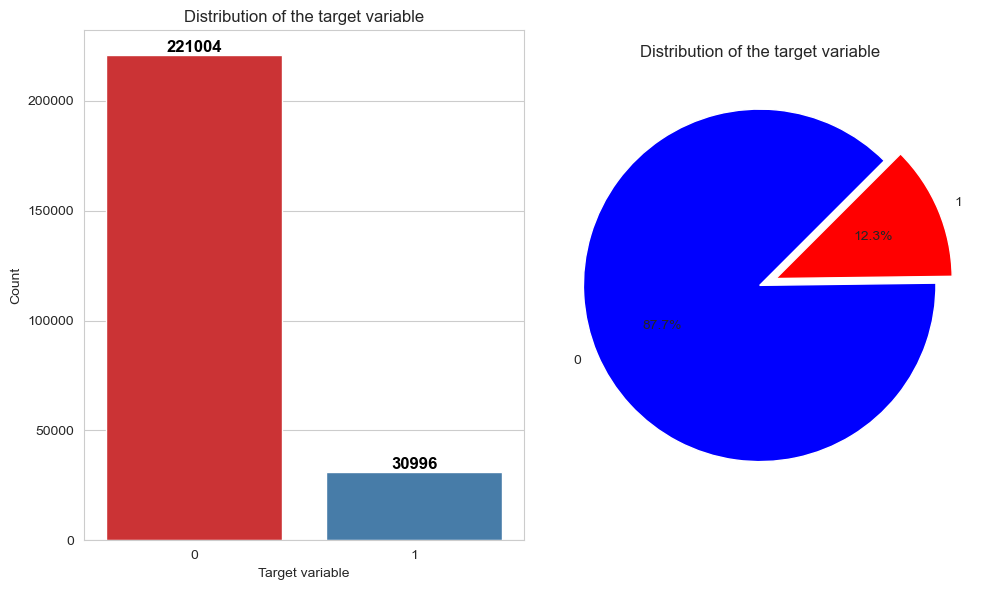

In [69]:
plt.subplot(1,2,1)
ax = sns.countplot(x='Risk_Flag', data=df, palette="Set1")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.Risk_Flag.value_counts(), labels = df.Risk_Flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['blue', 'red'] )
plt.title('Distribution of the target variable')
plt.tight_layout()
plt.show()

In [70]:
new_df=df
df.drop("Id", axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Income               252000 non-null  int64   
 1   Age                  252000 non-null  int64   
 2   Experience           252000 non-null  int64   
 3   Married_Single       252000 non-null  object  
 4   House_Ownership      252000 non-null  object  
 5   Car_Ownership        252000 non-null  object  
 6   Profession           252000 non-null  object  
 7   CITY                 252000 non-null  object  
 8   STATE                252000 non-null  object  
 9   CURRENT_JOB_YRS      252000 non-null  int64   
 10  CURRENT_HOUSE_YRS    252000 non-null  int64   
 11  Risk_Flag            252000 non-null  int64   
 12  Income_Category      252000 non-null  category
 13  Experience_Category  252000 non-null  category
 14  Age_Category         252000 non-null  category
dtype

In [72]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married_Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Category',
       'Experience_Category', 'Age_Category'],
      dtype='object')

In [73]:
df_dropped = df.drop(['Married_Single', 'House_Ownership', 'Car_Ownership','Profession','CITY','STATE','Income_Category','Experience_Category', 'Age_Category'], axis=1)

In [74]:
# Create a heatmap
sns.set()  # Set Seaborn style
plt.figure(figsize=(8, 6))  # Set figure size
#sns.heatmap(df_dropped, annot=True, cmap="coolwarm", linewidths=0.5, cbar=True)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [75]:
df_dropped.corr()['Risk_Flag'].sort_values().drop('Risk_Flag')

Experience          -0.035
Age                 -0.022
CURRENT_JOB_YRS     -0.017
CURRENT_HOUSE_YRS   -0.004
Income              -0.003
Name: Risk_Flag, dtype: float64

<Axes: >

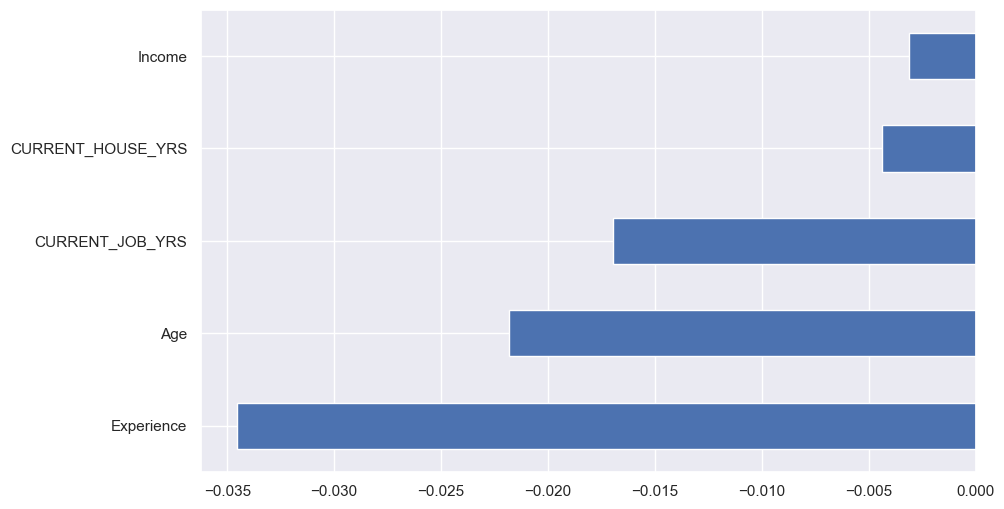

In [76]:
df_dropped.corr()['Risk_Flag'].sort_values().drop('Risk_Flag').plot(kind = 'barh')

**MODELLING**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married_Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_Category',
       'Experience_Category', 'Age_Category'],
      dtype='object')

In [79]:
#ONE HOT ENCODING
#pd.get_dummies(df.Car_Ownership)

In [80]:
df.dtypes

Income                    int64
Age                       int64
Experience                int64
Married_Single           object
House_Ownership          object
Car_Ownership            object
Profession               object
CITY                     object
STATE                    object
CURRENT_JOB_YRS           int64
CURRENT_HOUSE_YRS         int64
Risk_Flag                 int64
Income_Category        category
Experience_Category    category
Age_Category           category
dtype: object

In [81]:
#ONE HOT ENCODING
refined_df_=pd.get_dummies(data=df,drop_first=True,columns=['Car_Ownership','House_Ownership','Married_Single'])
refined_df_.head(50)

,Income,Age,Experience,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Category,Experience_Category,Age_Category,Car_Ownership_yes,House_Ownership_owned,House_Ownership_rented,Married_Single_single
0,1303834,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Lower Income,Level1,20-29,False,False,True,True
1,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,Higher-Upper Income,Level2,40-49,False,False,True,True
2,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,Middle-Lower Income,Level1,60-69,False,False,True,False
3,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,Middle-Upper Income,Level1,40-49,True,False,True,True
4,5768871,47,11,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Middle-Upper Income,Level3,40-49,False,False,True,True
5,6915937,64,0,Civil_servant,Jalgaon,Maharashtra,0,12,0,Middle-Upper Income,Level1,60-69,False,False,True,True
6,3954973,58,14,Librarian,Tiruppur,Tamil_Nadu,8,12,0,Middle-Lower Income,Level3,50-59,False,False,True,False
7,1706172,33,2,Economist,Jamnagar,Gujarat,2,14,0,Lower Income,Level1,30-39,False,False,True,True
8,7566849,24,17,Flight_attendant,Kota[6],Rajasthan,11,11,0,Higher-Upper Income,Level4,20-29,True,False,True,True
9,8964846,23,12,Architect,Karimnagar,Telangana,5,13,0,Higher-Upper Income,Level3,20-29,False,False,True,True


In [82]:
X=refined_df_.select_dtypes(exclude=['object'])

In [83]:
#droppping all columns with object and category datatypes
X=refined_df_.select_dtypes(exclude=['category','object'])

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Income                  252000 non-null  int64
 1   Age                     252000 non-null  int64
 2   Experience              252000 non-null  int64
 3   CURRENT_JOB_YRS         252000 non-null  int64
 4   CURRENT_HOUSE_YRS       252000 non-null  int64
 5   Risk_Flag               252000 non-null  int64
 6   Car_Ownership_yes       252000 non-null  bool 
 7   House_Ownership_owned   252000 non-null  bool 
 8   House_Ownership_rented  252000 non-null  bool 
 9   Married_Single_single   252000 non-null  bool 
dtypes: bool(4), int64(6)
memory usage: 12.5 MB


In [85]:
X=X.drop('Risk_Flag', axis=1)

In [86]:
X.shape


(252000, 9)

In [87]:
y=refined_df_.Risk_Flag

In [88]:
feature_names=['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Car_Ownership_yes', 'House_Ownership_owned', 'House_Ownership_rented',
       'Married_Single_single']

In [89]:
feature_names

['Income',
 'Age',
 'Experience',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS',
 'Car_Ownership_yes',
 'House_Ownership_owned',
 'House_Ownership_rented',
 'Married_Single_single']

###MODEL-1:DECISION TREE CLASSIFIER###

In [224]:
class_names=['Risk','No_Risk']

In [225]:
#Random Over Sampling
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_resampled))


from sklearn.model_selection import GridSearchCV

param_grid1 = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9,10],
              'criterion' :['gini', 'entropy']
             }

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

#train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)
decision_tree = tree.DecisionTreeClassifier(random_state=456)

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, verbose=True)
#grid_search.fit(X_resampled, y_resampled)
grid_search.fit(train_features, train_targets)


#decision_tree = decision_tree.fit(X_resampled, y_resampled)




Oversampled class distribution: Counter({0: 221004, 1: 221004})
Fitting 5 folds for each of 828 candidates, totalling 4140 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=456),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             verbose=True)

In [226]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=30, max_features='auto', min_samples_leaf=4,
                       random_state=456)

In [227]:
print("Best Avg. Validation Score: ", "%.4f" % grid_search.best_score_)

Best Avg. Validation Score:  0.8901


In [234]:
print(classification_report(test_targets, grid_search.predict(test_features)))
cm = confusion_matrix(test_targets, grid_search.predict(test_features))
TN, FP, FN, TP = cm.ravel()
print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')
train_error = np.round(grid_search.score(train_features, train_targets), 2)
test_error = np.round(grid_search.score(test_features, test_targets), 2)

print("Training Set Mean Accuracy = " + str(train_error))
print("Test Set Mean Accuracy = " + str(test_error))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44268
           1       0.56      0.49      0.52      6132

    accuracy                           0.89     50400
   macro avg       0.75      0.72      0.73     50400
weighted avg       0.89      0.89      0.89     50400

Confusion Matrix: TP: 2976 TN: 41939 FP: 2329 FN: 3156
Training Set Mean Accuracy = 0.91
Test Set Mean Accuracy = 0.89


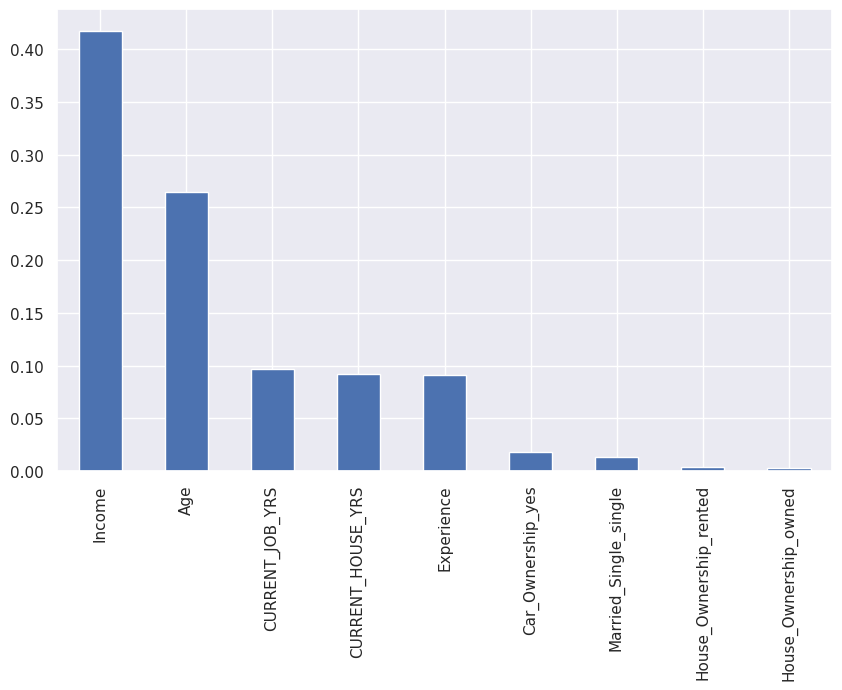

In [229]:
importances = grid_search.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [230]:
def build_tree(features, targets, feature_names, class_names):
    """ Builds a decision tree.
        Prints out the decision tree
        1) as a plot, 2) as text.
        Also outputs: 1) feature importance, 2) training set and test set mean accuracy of tree
        :param features: model features
        :param targets: model targets
        :param feature_names: names of the dataset features,
    """
    #Random Over Sampling
    ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
    X_resampled, y_resampled = ros.fit_resample(features, targets)
    print("Oversampled class distribution:", Counter(y_resampled))

    train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

    decision_tree = tree.DecisionTreeClassifier(random_state=456)
    decision_tree = decision_tree.fit(X_resampled, y_resampled)


    # Visualizing the decision tree

    # 1. Saving the image of the decision as a png
    #plt.subplots(figsize=(170, 120))
    #tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)
    #plt.savefig("decision_tree.png")

    y_pred=decision_tree.predict(test_features)


    print(classification_report(test_targets, decision_tree.predict(test_features)))
    cm = confusion_matrix(test_targets, decision_tree.predict(test_features))
    TN, FP, FN, TP = cm.ravel()
    print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')
    # Plot the confusion matrix
    #disp = ConfusionMatrixDisplay(confusion_matrix(test_targets, y_pred))
    #disp.plot(cmap='viridis', values_format='.2g', xticks_rotation='horizontal')
    #plt.title("Confusion Matrix")
    #plt.show()


    # 2. Output the tree as text in the console
    tree_as_text = tree.export_text(decision_tree, feature_names=feature_names)
    print(tree_as_text)
    # Feature Importance
    # Turns the feature importance array into a dataframe, so it has a table-like output format
    print_feature_importance(feature_names, decision_tree.feature_importances_)
    # Training and test mean accuracy
    train_error = np.round(decision_tree.score(train_features, train_targets), 2)
    test_error = np.round(decision_tree.score(test_features, test_targets), 2)

    print("Training Set Mean Accuracy = " + str(train_error))
    print("Test Set Mean Accuracy = " + str(test_error))

In [231]:
def print_feature_importance(names_array, importances_array):
    """ Prints out a feature importance array as a dataframe. """
    importances = pd.DataFrame(data=names_array)
    importances[1] = importances_array
    importances = importances.T
    importances.drop(0, axis=0, inplace=True)
    importances.columns = feature_names

    print(str(importances.reset_index(drop=True)))

In [232]:
#build_tree(X, y, feature_names, class_names)

###RANDOM FOREST CLASSIFIER###

In [ ]:
def oob_visualization(features,targets, number_of_trees):
  """
  """
  #Random Over Sampling
  ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
  X_resampled, y_resampled = ros.fit_resample(features, targets)
  print("Oversampled class distribution:", Counter(y_resampled))

  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
  min_tree_number = 5
  max_depth_arr = range(min_tree_number, number_of_trees+1)
  oob_error_arr = []

  for tree in max_depth_arr:

    if tree % 25 == 0:
      print("Building Random Forest with :"+ str(tree)+" trees")
      #Fit the model
      rf_model = RandomForestClassifier(random_state=321, bootstrap=True,oob_score=True, n_estimators=tree )
      rf_model.fit(X_train,y_train)

      # Make predictions
      y_pred = rf_model.predict(X_test)

      ##y_pred=rf_model.predict(X_test)
      #train_error = np.round(rf_model.score(X_test, y_test), 2)
      ##overallscore
      #pscore = accuracy_score(y_test,rf_model.predict(X_test))
      ##f1-score
      #score = f1_score(y_test,rf_model.predict(X_test))

      #test_error = np.round(rf_model.score(y_test, y_pred), 2)
      #print(f"Training Set Mean Accuracy =  {train_error:.4f}")
      #print("PScore = " + str(pscore))
      #print("F-1 Score = " + str(score))

      print(classification_report(y_test, rf_model.predict(X_test)))
      cm = confusion_matrix(y_test, rf_model.predict(X_test))
      TN, FP, FN, TP = cm.ravel()
      print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')

      # Plot the confusion matrix right one
      #disp = ConfusionMatrixDisplay(confusion_matrix(y_test, rf_model.predict(X_test)))
      #disp.plot(cmap='viridis', values_format='.2g', xticks_rotation='horizontal')
      #plt.title("Confusion Matrix")
      #plt.show()

      # Get predicted probabilities for positive class
      y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
      # Compute ROC curve
      fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

      # Calculate AUC (Area Under the Curve)
      auc = roc_auc_score(y_test, y_pred_proba)
      print("AUC-ROC:"+ str(auc))

      # Plot the ROC curve
      #plt.figure(figsize=(8, 6))
      #plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
      #plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
      #plt.xlabel('False Positive Rate (FPR)')
      #plt.ylabel('True Positive Rate (TPR)')
      #plt.title('ROC Curve')
      #plt.legend()
      #plt.grid(True)
      #plt.show()


      # Plot the confusion matrix (optional)
      #plt.matshow(cm)
      #plt.title("Confusion Matrix")
      #plt.colorbar()
      #plt.show()



      #measure OOB Error
      oob_error_arr.append(np.round(rf_model.oob_score_,2))

  lowest_oob_error = min(oob_error_arr)
  best_R_forest_size = oob_error_arr.index(lowest_oob_error)+min_tree_number

  print("\n Random Forest with :"+str(best_R_forest_size)+" trees, has lower OOB Error :"+ str(lowest_oob_error))
  print("\n Random Forest with :"+str(number_of_trees)+" trees, has lower OOB Error :"+ str(oob_error_arr[-1]))
  print(max_depth_arr)
  print(oob_error_arr)

  """
  fig, ax = plt.subplots(figsize=(17,12))

  #Removing top and right borders of  our figure
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  #y-axis limit range
  plt.ylim([0,1])

  ax.plot(max_depth_arr, oob_error_arr, color="Red", linewidth=5)

  #plot title and name of axes
  plt.title("OOB as a Function of trees in Random Forest", fontsize=20)
  ax.set_xlabel("Number of Trees in Random Forest: ", fontsize=15, labelpad=12)
  ax.set_xlabel("Out of Bag Error: ", fontsize=15, labelpad=12)

  plt.show()
  """





In [ ]:
scaler = StandardScaler() #Putting all our numeric data points into familiar range Robust is good for handing data with outliers
X_scaled = scaler.fit_transform(X)
oob_visualization(X,y,number_of_trees=150)

Oversampled class distribution: Counter({0: 221004, 1: 221004})
Building Random Forest with :25 trees


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     44323
           1       0.91      1.00      0.95     44079

    accuracy                           0.95     88402
   macro avg       0.95      0.95      0.95     88402
weighted avg       0.95      0.95      0.95     88402

Confusion Matrix: TP: 44056 TN: 39902 FP: 4421 FN: 23
AUC-ROC:0.9748698946530348
Building Random Forest with :50 trees
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     44323
           1       0.91      1.00      0.95     44079

    accuracy                           0.95     88402
   macro avg       0.96      0.95      0.95     88402
weighted avg       0.96      0.95      0.95     88402

Confusion Matrix: TP: 44048 TN: 40052 FP: 4271 FN: 31
AUC-ROC:0.9751539867142148
Building Random Forest with :75 trees
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     44323

KeyboardInterrupt: 

###K NEAREST NEIGHBORS###

In [ ]:
def knn_model(features, targets):
    """ Builds a decision tree.
        Prints out the decision tree
        1) as a plot, 2) as text.
        Also outputs: 1) feature importance, 2) training set and test set mean accuracy of tree
        :param features: model features
        :param targets: model targets
        :param feature_names: names of the dataset features
    """
    #Random Over Sampling
    ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
    X_resampled, y_resampled = ros.fit_resample(features, targets)
    print("Oversampled class distribution:", Counter(y_resampled))


    #train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

    train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=123)


    k = 3

    neigh_model = KNeighborsClassifier(n_neighbors = k)
    neigh_model = neigh_model.fit(X_resampled, y_resampled)


    y_pred=neigh_model.predict(test_features)


    print(classification_report(test_targets, neigh_model.predict(test_features)))
    cm = confusion_matrix(test_targets, neigh_model.predict(test_features))
    TN, FP, FN, TP = cm.ravel()
    print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')


    # Training and test mean accuracy
    train_error = np.round(neigh_model.score(train_features, train_targets), 2)
    test_error = np.round(neigh_model.score(test_features, test_targets), 2)

    print("Training Set Mean Accuracy = " + str(train_error))
    print("Test Set Mean Accuracy = " + str(test_error))

knn_model(X, y)

In [ ]:
 scaler = StandardScaler() #Putting all our numeric data points into familiar range Robust is good for handing data with outliers
 X_scaled = scaler.fit_transform(X)

In [ ]:
knn_model(X_scaled, y)

Oversampled class distribution: Counter({0: 221004, 1: 221004})
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     44268
           1       0.59      0.90      0.71      6132

    accuracy                           0.91     50400
   macro avg       0.79      0.91      0.83     50400
weighted avg       0.94      0.91      0.92     50400

Confusion Matrix: TP: 5532 TN: 40392 FP: 3876 FN: 600
Training Set Mean Accuracy = 0.91
Test Set Mean Accuracy = 0.91


###RF OTHER APPROACH###

In [ ]:
#Random Over Sampling
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_resampled))


#train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)


Oversampled class distribution: Counter({0: 221004, 1: 221004})


In [ ]:
rf_model = RandomForestClassifier(random_state=456, oob_score=True)
rf_model.fit(train_features,train_targets)

RandomForestClassifier(oob_score=True, random_state=456)

In [ ]:
y_pred=rf_model.predict(test_features)
train_error = np.round(rf_model.score(test_features, test_targets), 2)

#overallscore
pscore = accuracy_score(test_targets,y_pred)
#f1-score
score = f1_score(test_targets,y_pred)

#test_error = np.round(rf_model.score(test_targets, y_pred), 2)
print(f"Training Set Mean Accuracy =  {train_error:.4f}")
print("PScore = " + str(pscore))
print("F-1 Score = " + str(score))


Training Set Mean Accuracy =  0.9500
PScore = 0.9499898192348589
F-1 Score = 0.952416829008406


Income                   0.378
Age                      0.258
Experience               0.119
CURRENT_JOB_YRS          0.111
CURRENT_HOUSE_YRS        0.091
Car_Ownership_yes        0.021
House_Ownership_owned    0.004
House_Ownership_rented   0.007
Married_Single_single    0.011
dtype: float64


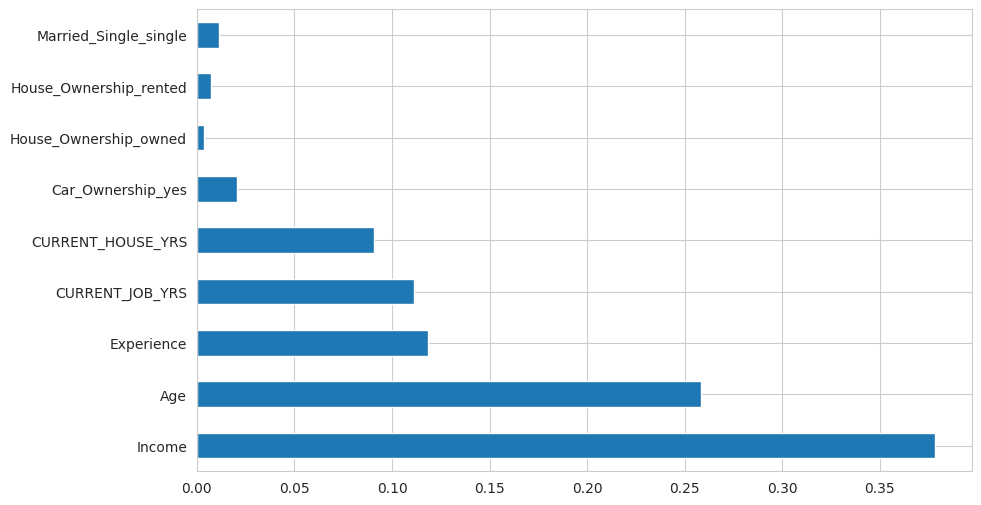

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

Oversampled class distribution: Counter({0: 221004, 1: 221004})
OOB R2 score: 0.8973859126984127
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44268
           1       0.60      0.54      0.56      6132

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.90      0.90      0.90     50400

Confusion Matrix: TP: 3283 TN: 42051 FP: 2217 FN: 2849
Training Set Mean Accuracy = 0.91
Test Set Mean Accuracy = 0.89
Income                   0.408
Age                      0.261
Experience               0.103
CURRENT_JOB_YRS          0.097
CURRENT_HOUSE_YRS        0.089
Car_Ownership_yes        0.018
House_Ownership_owned    0.004
House_Ownership_rented   0.007
Married_Single_single    0.013
dtype: float64


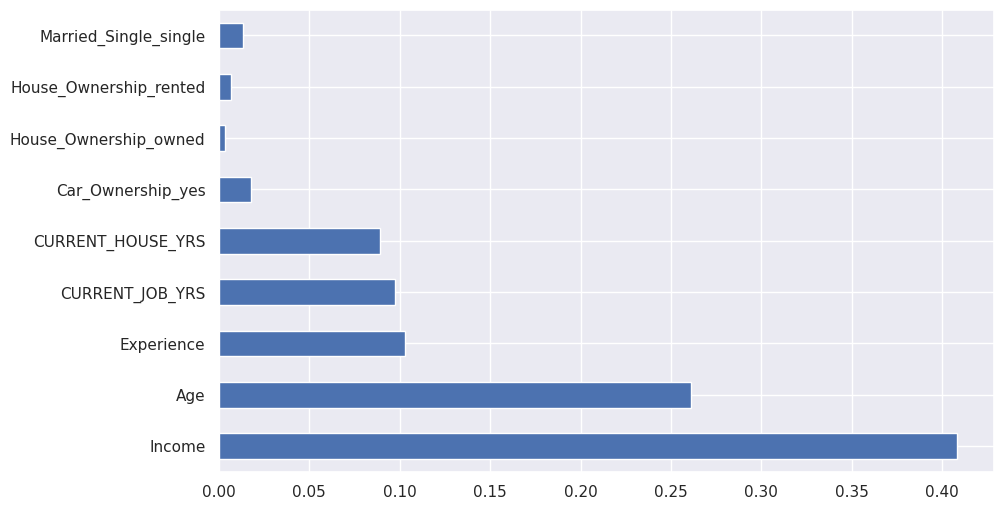

In [235]:
#Random Over Sampling

ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_resampled))

train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)



# RF Model
rf_modelWithoob = RandomForestClassifier(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(train_features, train_targets)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)

y_pred = rf_modelWithoob.predict(test_features)

#overallscore
#pscore = accuracy_score(test_targets,y_pred)
#f1-score
#score = f1_score(test_targets,y_pred)

print(classification_report(test_targets, rf_modelWithoob.predict(test_features)))
cm = confusion_matrix(test_targets, rf_modelWithoob.predict(test_features))
TN, FP, FN, TP = cm.ravel()
print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')
train_error = np.round(grid_search.score(train_features, train_targets), 2)
test_error = np.round(grid_search.score(test_features, test_targets), 2)

print("Training Set Mean Accuracy = " + str(train_error))
print("Test Set Mean Accuracy = " + str(test_error))


# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
#Random Over Sampling

ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Oversampled class distribution:", Counter(y_resampled))

train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)



# RF Model
rf_modelWithoob = RandomForestClassifier(random_state=42, oob_score=True)

Oversampled class distribution: Counter({0: 221004, 1: 221004})


In [ ]:
param_grid = { 'n_estimators': [25, 50, 75, 100, 125, 150], # n_estimators: This hyperparameter defines the number of trees in the Random Forest ensemble. By default, it’s set to 100
              'max_depth': [None, 2, 5, 10],  # max_depth: Determines the maximum depth of each tree. A shallow tree (low max_depth) may underfit, while a deep tree (high max_depth) may overfit.
               #'min_samples_split': [2, 5, 10], #min_samples_split: Specifies the minimum number of samples required to split an internal node. It helps prevent overfitting.
               #'min_samples_leaf': [1, 2, 4], #min_samples_leaf: Similar to min_samples_split, this parameter sets the minimum number of samples required to be at a leaf node. It prevents nodes from becoming too small, reducing overfitting.
               'max_features': ['auto', 'sqrt', 'log2'] #max_features: Finally, let’s focus on max_features. This hyperparameter determines the maximum number of features provided to each tree. It controls the randomness in feature selection during tree construction.
               }

In [ ]:
scoring = {'accuracy': 'accuracy', 'f1_score': 'f1','recall': 'recall' }
print(scoring)


{'accuracy': 'accuracy', 'f1_score': 'f1', 'recall': 'recall'}


In [ ]:
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring,refit='accuracy')
grid_search.fit(X_resampled, y_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: S

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100, 125, 150]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1_score': 'f1',
                      'recall': 'recall'})

In [ ]:
print(classification_report(test_targets, grid_search.predict(test_features)))
cm = confusion_matrix(test_targets, grid_search.predict(test_features))
TN, FP, FN, TP = cm.ravel()
print(f'Confusion Matrix: TP: {TP} TN: {TN} FP: {FP} FN: {FN}')

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     44137
           1       0.92      1.00      0.96     44265

    accuracy                           0.96     88402
   macro avg       0.96      0.96      0.96     88402
weighted avg       0.96      0.96      0.96     88402

Confusion Matrix: TP: 44261 TN: 40334 FP: 3803 FN: 4


In [ ]:
#Plot the confusion matrix right one
disp = ConfusionMatrixDisplay(confusion_matrix(test_targets, grid_search.predict(test_features)))
disp.plot(cmap='viridis', values_format='.2g', xticks_rotation='horizontal')
plt.title("Confusion Matrix")
plt.show()

# Get predicted probabilities for positive class
y_pred_proba = grid_search.predict_proba(train_targets)[:, 1]
# Compute ROC curve
fpr, tpr, tr = roc_curve(test_targets, y_pred_proba)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:"+ str(auc))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#y_pred = grid_search.predict(X_test)
#overallscore
#pscore = accuracy_score(y_test,y_pred)
#f1-score
#score = f1_score(y_test, y_pred)

#print('Over All Score:', pscore)
#print('F-1 score:', score)

In [ ]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_f1_score', 'split1_test_f1_score', 'split2_test_f1_score', 'split3_test_f1_score', 'split4_test_f1_score', 'mean_test_f1_score', 'std_test_f1_score', 'rank_test_f1_score', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])


In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best  score:', grid_search.best_score_)
print('Best F1 score:', abs(grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]))

Best hyperparameters: {'max_depth': None, 'n_estimators': 25}
Best  score: 0.9079832531870364
Best F1 score: 0.9079832531870364


Income                   0.376
Age                      0.254
Experience               0.120
CURRENT_JOB_YRS          0.114
CURRENT_HOUSE_YRS        0.093
Car_Ownership_yes        0.021
House_Ownership_owned    0.004
House_Ownership_rented   0.008
Married_Single_single    0.011
dtype: float64


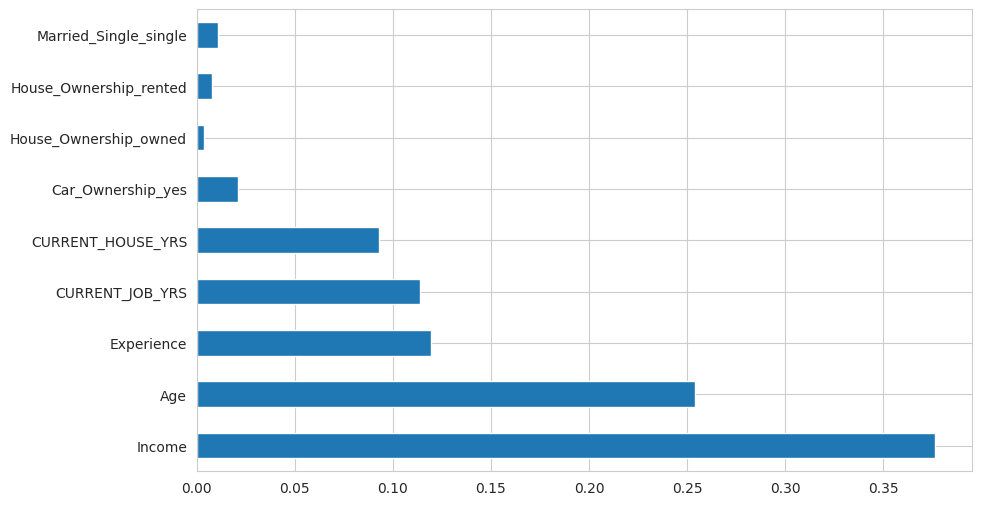

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

In [ ]:
#from sklearn.tree import plot_tree

#fig, ax = plt.subplots(figsize=(16, 8))
#plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
#plt.show()

###SVM###

In [90]:
from sklearn import svm
from sklearn.preprocessing import RobustScaler

In [91]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

In [ ]:
scaler = RobustScaler() #Putting all our numeric data points into familiar range Robust is good for handing data with outliers
X_train_scaled = scaler.fit_transform(train_features)
X_test_scaled = scaler.transform(test_features)

In [ ]:
svm_model = svm.SVC()
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'gamma': [0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(svm_model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, train_targets)

In [ ]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n'
y_pred = best_classifier.predict(X_test_scaled)
print(confusion_matrix(test_targets, y_pred))
print(classification_report(test_targets, y_pred))

sns.heatmap(confusion_matrix(test_targets, y_pred), annot=True, cmap="YlGnBu")

In [ ]:
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='barh')
plt.show()

In [ ]:
# Perform grid search with cross-validation
"""
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred))
print('Test Accuracy score:', accuracy_score(y_test, y_pred))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
#print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
#print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB R2 score:', f1_score(y_train, oob_predictions))
print('\n')

# Obtain feature importances and plot them
importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances based on OOB:')
print(importances_oob)
importances_oob.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()
"""

###ANN CLASSIFIER###

In [ ]:
!pip install scikeras

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

train_features, test_features, train_targets, test_targets = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=123)

In [ ]:
train_features.shape

(353606, 9)

In [ ]:

#Model Architecture Function
def create_model():
  model =Sequential()
  #Input Layer with 32 neurons , number of features in the X_train and Activation Function
  model.add(Dense(32,input_dim=9,activation='relu'))
  #Hidden Layer does not require number of features as input layer will supply inpus to this layer
  #You can define as many layers as possible based on task
  model.add(Dense(16,activation='relu'))
  #Another layer
  model.add(Dense(8,activation='sigmoid'))
  #Another layer
  model.add(Dense(4,activation='sigmoid'))
  #Output layer has only 1 Neuron
  model.add(Dense(1,activation='linear'))


  model.compile(loss='binary_crossentropy',optimizer='adam')
  return model


#Create Model
model=KerasClassifier(build_fn=create_model,verbose=0)
print(model)

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7fc83ee0ae60>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)


In [ ]:
param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'sgd', 'Adamax']}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_result=grid.fit(train_features,train_targets)

# print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
